In [1]:
import csv #import packages
from datetime import datetime
from urllib.request import urlopen
try:
    import urllib.request as urllib2
except ImportError:
    import urllib2
import re
import pandas as pd
from bs4 import BeautifulSoup
import numpy as np
import statistics
import matplotlib.pyplot as plot
import math

In [31]:
def getHomePct(url1): #gets the home team's average winning percentage
    Team = []
    Team1=[]
    with urlopen(url1) as url:
        page = url.read()
    homePct = re.findall(r'homeWinPercentage":(.*?),',str(page))
    winPct = []
    owinPct = []
    j = 0
    for i in homePct:
        pct = float(i)
        winPct.append(pct)
        owinPct.append(1-pct)
        j+=1
    thisSum = sum(winPct)
    truePct = thisSum/j
    oTruePct = 1-truePct
    Team.append(oTruePct)
    Team1.append(winPct)
    print("Home Win Percentage: "+str(truePct))
    return (Team1,truePct) #returns total win percentage as well as an array of each win percentage at each point in the game

In [3]:
def getAwayPct(url1): #gets the away team's average winning percentage
    Team = []
    Team1=[]
    with urlopen(url1) as url: 
        page = url.read()
    homePct = re.findall(r'homeWinPercentage":(.*?),',str(page))
    winPct = []
    owinPct = []
    j = 0
    for i in homePct:
        pct = float(i)
        winPct.append(pct)
        owinPct.append(1-pct)
        j+=1
    thisSum = sum(winPct)
    truePct = thisSum/j
    oTruePct = 1-truePct
    Team.append(oTruePct)
    Team1.append(owinPct)
    print("Away Win Percentage: "+str(oTruePct))
    return (Team1,oTruePct) #returns total win percentage as well as an array of each win percentage at each point in the game

In [4]:
def normalizeGraph(winPercentage): #to normalize the win percentage graphs (optional)
    allPerc = []
    newMean = (statistics.mean(winPercentage[0][0]))
    newSTD = (statistics.pstdev(winPercentage[0][0]))
    for perc in winPercentage[0][0]:
        allPerc.append(perc)
    plot.plot(allPerc)
    plot.xlabel("Play #")
    plot.ylabel("Normalized Win Percentage")
    plot.title("How Win Percentage Changed Over Time")

In [5]:
def findPct(url1): #functions return arrays of win percentage, plays
    with urlopen(url1) as url:
        page = url.read()
    homePct = re.findall(r'homeWinPercentage":(.*?),',str(page))
    return homePct

def getplays(url1):
    with urlopen(url1) as url:
        page = url.read()
    playbyplay = re.findall(r'text":(.*?),',str(page))
    return playbyplay

In [6]:
def normalizeHomePct(pctList): #optional functions intended to normalize percentages, need to be modified to normalize properly
    newPct = []
    for i in pctList:
        awayPct = 1-float(i)
        newPct.append((awayPct))
    return newPct

In [7]:
def normalizeAwayPct(pctList):
    newPct = []
    for i in pctList:
        awayPct = float(i)
        newPct.append((awayPct))
    return newPct

In [8]:
def findKick(thislist): #finds the kickoff in the list of plays
    count = 0
    for statement in thislist:
        if "kicks" in statement:
            
            return count
        count+=1

In [10]:
def popPlays(playList,newcount): #populates an array with the plays from the game
    count=0
    playindex = []
    for i in playList:
        if count>newcount-1:
            playindex.append(i)
        count+=1
    return playindex

In [12]:
def stack(plays,percents,count,playbyplay): #combines the plays and their corresponding percentages
    try:
        combinedData = np.column_stack((plays,percents))
        return combinedData
    except ValueError as e: #if an error caused by ESPN formatting, move until the lists are correctly aligned
        if len(plays) > len(percents):
            diff = len(plays)-len(percents)
            while diff>0:
                percents.append(0)
                diff+=-1
        if len(percents) > len(plays):
            diff = len(percents) - len(plays)
            while diff>0:
                del percents[0]
                diff+=-1
        print(len(plays))
        print(len(percents))
        print("Values not aligned")
        
        combinedData = np.column_stack((plays,percents))
        return combinedData

In [13]:
def RBPerc(name,nameAbrev,data): #function for calculating win percentage added by RBs
    count = 0
    sumPct = []
    passPct = []
    runPct = []
    outPlay = []
    inPlay = []
    rightPlay = []
    leftPlay = []
    for string in data:
        if count<len(data)-1:
            count +=1
        if nameAbrev in data[count][0]: #to view the plays being looked at, add a print statement for data[count]
            if "FUMBLES" in string[0]:
                continue
            if "INTERCEPTED" in string[0]:
                continue
            if "INTERCEPTED" in data[count][0]:
                continue
            if " right " in data[count][0]:
                rightPlay.append((float(data[count][1])-float(string[1])))
                
            if " left " in data[count][0]:
                leftPlay.append((float(data[count][1])-float(string[1])))
                
            if " end " in data[count][0]:
                outPlay.append((float(data[count][1])-float(string[1])))
                
            if " guard " in data[count][0]: #can be combined with right and left to view where on the line RBs had the most success (need to check ESPN formatting first)
                inPlay.append((float(data[count][1])-float(string[1])))
                
            if " tackle " in data[count][0]:
                outPlay.append((float(data[count][1])-float(string[1])))
                
            if " up the middle " in data[count][0]:
                inPlay.append((float(data[count][1])-float(string[1])))
                
            if "Pass" in data[count][0]:
                passPct.append((float(data[count][1])-float(string[1])))
                continue
            if "pass" in data[count][0]:
                passPct.append((float(data[count][1])-float(string[1])))
                continue
            else:
                sumPct.append((float(data[count][1])-float(string[1]))) #home
        
        if name in data[count][0]:
            
            if "pass" in data[count][0]:
                passPct.append((float(data[count][1])-float(string[1])))
                continue
            if "Pass" in data[count][0]:
                passPct.append((float(data[count][1])-float(string[1])))
                continue
            else:
                sumPct.append((float(data[count][1])-float(string[1]))) #home
    print(name) 
    print("\n")
    if len(sumPct) != 0:
        print("Rushes outside: "+str(sum(outPlay))+"\n")
        print("Rushes inside: "+str(sum(inPlay))+"\n")
        print("Rushes right: "+str(sum(rightPlay))+"\n")
        print("Rushes left: "+str(sum(leftPlay))+"\n")
        print("Rushing Stats\n")
        print(sumPct)
    
        print("Total Rushing Win Percentage Added: "+str(sum(sumPct)))
        print("Rushing Median: "+str(statistics.median(sumPct)))
        print("Rushing Standard Dev: "+str(statistics.pstdev(sumPct)))
    print("\n")
    if len(passPct) != 0:
        print("Receiving Stats\n")
        print(passPct)
        print("Total Receiving Win Percentage Added: "+str(sum(passPct)))
        print("Receiving Median: "+str(statistics.median(passPct)))
        print("Receiving Standard Dev: "+str(statistics.pstdev(passPct)))
    return ((sum(sumPct))+(sum(passPct)),sum(rightPlay),sum(leftPlay)) #returns the sum of their rushing and receiving numbers, as well as values from left and right plays

In [33]:
def QBPerc(name,nameAbrev,data): #same as RBPerc, but for QBs
    count = 0
    sumPct = []
    passPct = []
    runPct = []
    rightPlay = []
    leftPlay = []
    for string in data:
        if count<len(data)-1:
            count +=1
        if nameAbrev in data[count][0]:
            if "FUMBLES" in string[0]:
                continue
            if "TWO-POINT CONVERSION ATTEMPT" in data[count][0]:
                passPct.append((float(data[count][1])-float(string[1]))/2)
                continue
            if " right " in data[count][0]:
                rightPlay.append((float(data[count][1])-float(string[1])))
            if " left " in data[count][0]:
                leftPlay.append((float(data[count][1])-float(string[1])))
            if "Pass" in data[count][0]:
                passPct.append((float(data[count][1])-float(string[1])))
                continue
            if "pass" in data[count][0]:
                passPct.append((float(data[count][1])-float(string[1])))
                continue
            else:
                sumPct.append((float(data[count][1])-float(string[1])))
        
        if name in data[count][0]:
            if "TWO-POINT CONVERSION ATTEMPT" in data[count][0]:
                passPct.append((float(data[count][1])-float(string[1]))/2)
                continue
            if "pass" in data[count][0]:
                passPct.append((float(data[count][1])-float(string[1])))
                continue
            if "Pass" in data[count][0]:
                passPct.append((float(data[count][1])-float(string[1])))
                continue
            else:
                sumPct.append((float(data[count][1])-float(string[1])))
    print(name) 
    print("\n")
    print("Passes right: "+str(sum(rightPlay))+"\n")
    print("Passes left: "+str(sum(leftPlay))+"\n")
    if len(sumPct) != 0:
 
        print("Rushing Stats\n")
        print(sumPct)
    
        print("Total Rushing Win Percentage Added: "+str(sum(sumPct)))
        print("Rushing Median: "+str(statistics.median(sumPct)))
        print("Rushing Standard Dev: "+str(statistics.pstdev(sumPct)))
    print("\n")
    if len(passPct) != 0:
        print("Passing Stats\n")
        print(passPct)
        print("Total Passing Win Percentage Added: "+str(sum(passPct)))
        print("Passing Median: "+str(statistics.median(passPct)))
        print("Passing Standard Dev: "+str(statistics.pstdev(passPct)))
    print("\n")
    return ((sum(passPct))+(sum(sumPct)),sum(rightPlay),sum(leftPlay))

In [14]:
def DPerc(name,nameAbrev,data): #same as previous two, but for defense
    count = 0
    sumPct = []
    passPct = []
    runPct = []
    rightPlay = []
    leftPlay = []
    for string in data:
        if count<len(data)-1:
            count +=1
        if nameAbrev in data[count][0]:
            if " right " in data[count][0]:
                rightPlay.append((float(data[count][1])-float(string[1])))
                
            if " left " in data[count][0]:
                leftPlay.append((float(data[count][1])-float(string[1])))
                
            if "Pass" in data[count][0]:
                passPct.append((float(data[count][1])-float(string[1])))
                continue
            if "pass" in data[count][0]:
                passPct.append((float(data[count][1])-float(string[1])))
                continue
            else:
                sumPct.append((float(data[count][1])-float(string[1])))
        
        if name in data[count][0]:
            
            if "pass" in data[count][0]:
                passPct.append((float(data[count][1])-float(string[1])))
                continue
            if "Pass" in data[count][0]:
                passPct.append((float(data[count][1])-float(string[1])))
                continue
            else:
                sumPct.append((float(data[count][1])-float(string[1])))
    print(name) 
    print("\n")
    print("Pass Defense Right: "+str(sum(rightPlay))+"\n")
    print("Pass Defense Left: "+str(sum(leftPlay))+"\n")
    if len(sumPct) != 0:
 
        print("Rush Defense Stats\n")
        print(sumPct)
    
        print("Total Rushing Win Percentage Added: "+str(sum(sumPct)))
        print("Rushing Median: "+str(statistics.median(sumPct)))
        print("Rushing Standard Dev: "+str(statistics.pstdev(sumPct)))
    print("\n")
    if len(passPct) != 0:
        print("Pass Defense Stats\n")
        print(passPct)
        print("Total Passing Win Percentage Added: "+str(sum(passPct)-len(passPct)))
        print("Passing Median: "+str(statistics.median(passPct)))
        print("Passing Standard Dev: "+str(statistics.pstdev(passPct)))
    print("\n")
    return (((sum(passPct))-len(passPct))+(sum(sumPct)),sum(rightPlay),sum(leftPlay))

In [15]:
def detectHome(teamName,gameID): #finds which team is the home team
    

    homeAway = 2
    with urlopen(gameID) as url:
        page = url.read()
    homeTeam = re.findall(r'gameInfo":(.*?),',str(page))
    homeStr = homeTeam[0]
    vs = " vs "
    after = homeStr[homeStr.index(vs) + len(vs):]

    plus = "+"
    matchup = homeStr[homeStr.index(plus) + len(plus):]
    matchup = matchup.replace('"','')
    awayteam = matchup.split(vs)[0]
    hometeam = after.split(':')[0]
    oldweek = after.split(':')[1]
    newweek = oldweek.replace('"','')
    newweek = newweek.replace('-',' ')
    print('-----------------------------------------------')
    print("Home: "+hometeam)
    print("Away: "+awayteam)
    print(newweek)
    if teamName.lower()==hometeam.lower():
        homeAway = homeAway-1
        otherTeam = awayteam
    elif teamName.lower() == awayteam.lower():
        homeAway = homeAway-2
        otherTeam = hometeam
    else:
        print("Invalid Team")
    return (homeAway,otherTeam)

In [16]:
def nameConcat(name): #shrinks player name to match game formatting (i.e. Odell Beckham --> O. Beckham)
    firstname = name.split(" ")[0]
    lastname = name.split(" ")[1]
    firstinit = firstname[0]
    nameAbrev = (firstinit+"."+lastname)
    return nameAbrev 

In [18]:
def getNames(gameList): #gets the names of each team within the schedule, optional
    totalList = []
    for gameID in gameList:
        with urlopen(gameID) as url:
            page = url.read()
        homeTeam = re.findall(r'gameInfo":(.*?),',str(page))
        homeStr = homeTeam[0]
        vs = " vs "
        after = homeStr[homeStr.index(vs) + len(vs):]

        plus = "+"
        matchup = homeStr[homeStr.index(plus) + len(plus):]
        matchup = matchup.replace('"','')
        awayteam = matchup.split(vs)[0]
        totalList.append(awayteam)
    return totalList

In [17]:
def combineFun(gameID,name,teamName,pos): #to get single game data, un-comment bottom line to get single game instead of entire season
    nameAbrev = nameConcat(name)
    errorString = "Error, invalid inputs"
    bothInt = detectHome(teamName,gameID)
    homeInt = bothInt[0]
    otherTeam = bothInt[1]
    if homeInt == 0:
        teamPerc = getAwayPct(gameID)
        ourPerc=teamPerc[1]
        perc = normalizeHomePct(findPct(gameID)) 
    elif homeInt == 1:
        teamPerc =getHomePct(gameID)
        ourPerc=teamPerc[1]
        perc = normalizeAwayPct(findPct(gameID))
        
    else:
        return errorString
    playList = getplays(gameID)
    thisCount = findKick(playList)
    playindex = popPlays(playList,thisCount)
    data = stack(playindex,perc,thisCount,playList)
    if pos==0:
        totalPerc = RBPerc(name,nameAbrev,data)
    elif pos==1:
        totalPerc = QBPerc(name,nameAbrev,data)
    elif pos==2:
        totalPerc = DPerc(name,nameAbrev,data)
    usePerc = totalPerc[0]
    rightPerc = totalPerc[1]
    leftPerc = totalPerc[2]
    return (usePerc,otherTeam,ourPerc,rightPerc,leftPerc)
#combineFun("http://www.espn.com/nfl/game/_/gameId/401030834","Drew Brees","New Orleans Saints",1) #0=RB,WR,TE 1=QB, 2=DEF

-----------------------------------------------
Home: Denver Broncos
Away: Carolina Panthers
week 1
0
Away Win Percentage: 0.5564107142857144
Cam Newton


Passes right: 0.26200000000000034

Passes left: -0.3320000000000002

Rushing Stats

[0.008000000000000007, -0.0020000000000000018, -0.0129999999999999, 0.16200000000000014, 0.018000000000000016, 0.03300000000000003, -0.018000000000000016, -0.0050000000000000044, -0.04299999999999993, -0.027000000000000135, 0.0050000000000000044, 0.0010000000000000009, -0.07199999999999995, -0.03400000000000003, -0.09799999999999998, -0.358, 0.41400000000000003]
Total Rushing Win Percentage Added: -0.028999999999999693
Rushing Median: -0.0050000000000000044
Rushing Standard Dev: 0.14272588483065027


Passing Stats

[-0.017000000000000015, 0.07600000000000007, 0.06800000000000006, -0.030000000000000027, -0.03400000000000003, -0.039999999999999925, 0.06599999999999995, -0.014000000000000012, -0.02200000000000002, 0.06400000000000006, -0.0149999999999999

C:\Users\Eric\Anaconda3\lib\site-packages\matplotlib\text.py:2096: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  warnings.warn("You have used the `textcoords` kwarg, but not "


['http://www.espn.com/nfl/game/_/gameId/400874484',
 'http://www.espn.com/nfl/game/_/gameId/400874535',
 'http://www.espn.com/nfl/game/_/gameId/400874615',
 'http://www.espn.com/nfl/game/_/gameId/400874664',
 'http://www.espn.com/nfl/game/_/gameId/400874648',
 'http://www.espn.com/nfl/game/_/gameId/400874707',
 'http://www.espn.com/nfl/game/_/gameId/400874625',
 'http://www.espn.com/nfl/game/_/gameId/400874596',
 'http://www.espn.com/nfl/game/_/gameId/400874580',
 'http://www.espn.com/nfl/game/_/gameId/400874609',
 'http://www.espn.com/nfl/game/_/gameId/400874670',
 'http://www.espn.com/nfl/game/_/gameId/400874728',
 'http://www.espn.com/nfl/game/_/gameId/400874559',
 'http://www.espn.com/nfl/game/_/gameId/400874716',
 'http://www.espn.com/nfl/game/_/gameId/400874540',
 'http://www.espn.com/nfl/game/_/gameId/400874635']

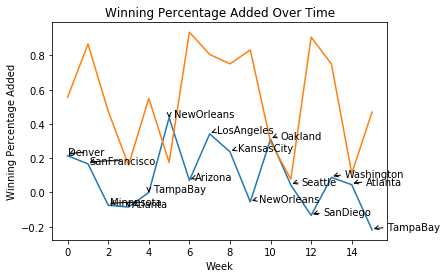

In [34]:
def getSeason(player,pos,teamAbrev,year,teamName): #to get a total season of data
    if int(year)<2016:
        print('Invalid year, must be 2016 or later.')
        return
    links = []
    teamNames=[]
    winPerc = []
    allPerc = []
    allPct =[]
    rightPct = []
    leftPct = []
    year = str(year)
    count=0
    empCount = 0
    itemCount = 0
    stopVar = 0
    encomp = []
    try:
        with urlopen ("http://www.espn.com/nfl/team/schedule/_/name/"+teamAbrev+"/season/"+year) as url:
            page = url.read()
            soup = BeautifulSoup(page,'lxml')
    except urllib2.HTTPError as e:
        print('Invalid URL, try checking team abbreviation.')
        return
    table = soup.find('table', {'class': 'Table2__table-scroller Table2__table'})
    rows = table.findAll('tr')
    for tr in rows:
        cols2 = tr.findAll('td',class_="Table2__Title pt6 Table2__td")
        if not cols2:
            empCount+=1
        for item in cols2:
            if empCount>10:
                stopVar = 1
            empCount = 0
            itemCount+=1
        
        if (itemCount<3) and (stopVar == 0):
            cols = tr.findAll('td', class_="Table2__td")
            if len(cols)>2:
                try:
                    link = cols[3].find('a').get('href')
                    links.append(link)
                    count+=1
                except AttributeError as e:
                    continue
            else:
                continue
    for link in links:
        bothPct = combineFun(link,player,teamName,pos)
        allPct.append(bothPct[0])
        thisName = bothPct[1].split(' ')
        if len(thisName)==2:
            teamNames.append(thisName[0])
        else:
            teamNames.append(thisName[0]+thisName[1])
        winPerc.append(bothPct[2])
        rightPct.append(bothPct[3])
        leftPct.append(bothPct[4])
    for perc in winPerc:
        allPerc.append(perc)
    fig = plot.figure()
    ax = fig.add_subplot(111)

    plot.plot(allPct) #remove plots if matplotlib not compatible
    plot.xlabel("Week")
    plot.ylabel("Winning Percentage Added")
    plot.title("Winning Percentage Added Over Time")
    plot.plot(allPerc)
    count=0
    for x in teamNames:
        if count<=len(allPct):
            ax.annotate(x,xy=(count,allPct[count]),textcoords='offset points',arrowprops=dict(arrowstyle="->",
                            connectionstyle="angle3,angleA=0,angleB=90"))
            count+=1
    print(sum(allPct))
    print("Right: "+str(sum(rightPct)))
    print("Left: "+str(sum(leftPct)))
    rightPct.insert(0,'RightPct')
    leftPct.insert(0,'LeftPct')
    allPct.insert(0,'PlayerPct')
    allPerc.insert(0,'TeamPct')
    encomp.append(allPct)
    encomp.append(allPerc)
    encomp.append(rightPct)
    encomp.append(leftPct)
    encomp = list(zip(*encomp))
    #with open('NFLWinPct/'+teamAbrev+player.split(' ')[0]+player.split(' ')[1]+year+'.csv', 'a',newline='') as csv_file: #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
    #    writer = csv.writer(csv_file)
    #    writer.writerows(encomp)
    return links
getSeason("Cam Newton",1,"car","2016","Carolina Panthers") #0=RB,WR,TE, 1=QB, 2=DEF